In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Initial CSV Read

xGS_Total = pd.read_csv(r'CSVs\International\Int_xGS_Total.csv' ,encoding='latin-1')
xGA_Total = pd.read_csv(r'CSVs\International\Int_xGA_Total.csv' ,encoding='latin-1')
# loading linear algorithms
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge

# tree based algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# Get corrs between Gls and features
xGS_corrs = abs(xGS_Total.corr())['Gls'].sort_values(ascending=False)
xGA_corrs = abs(xGA_Total.corr())['O. Gls'].sort_values(ascending=False)

In [ ]:
# It looks like G/Sh is the highest correlated feature with Gls.
xGS_corrs

In [ ]:
xGA_corrs

In [ ]:
xGS_Total.columns

In [2]:
# first ML model for XGS & xGA, dropping irrelevant features AND FEATURES THAT ARE VERY SIMILAR i.e. G/SoT being dropped and keeping G/sh
xGS_Column_Drop_List = ['Key','Year','Competition','Squad','Age','Sh','MP','G/SoT','CrdY','CrdR','Fld','TklW','O. TklW']
xGA_Column_Drop_List = ['Key','Year','Competition','Squad','O. Age','O. Sh','O. MP','O. G/SoT','O. CrdR','O. Fld', 'O. TklW', 'TklW']

xGS_Model_1 = xGS_Total.drop(xGS_Column_Drop_List, axis=1)
xGA_Model_1 = xGA_Total.drop(xGA_Column_Drop_List, axis=1)

In [3]:
# Scaling Remaining Features - removing Gls and Confederation when scaling, and adding back in

xGS_Model_1_features = xGS_Model_1.drop(['Confederation','Gls'], axis=1)
xGA_Model_1_features = xGA_Model_1.drop(['Confederation','O. Gls'], axis=1)

xGS_scaler = StandardScaler().fit(xGS_Model_1_features)
xGA_scaler = StandardScaler().fit(xGA_Model_1_features)


xGS_scaler_df = pd.DataFrame(xGS_scaler.transform(xGS_Model_1_features), columns = xGS_Model_1_features.columns)
xGA_scaler_df = pd.DataFrame(xGA_scaler.transform(xGA_Model_1_features), columns = xGA_Model_1_features.columns)

xGS_scaler_df['Gls'] = xGS_Model_1['Gls']
xGA_scaler_df['O. Gls'] = xGA_Model_1['O. Gls']
xGS_scaler_df['Confederation'] = xGS_Model_1['Confederation']
xGA_scaler_df['Confederation'] = xGA_Model_1['Confederation']

In [5]:
# Create final model variable and one-hot encode Confederation

xGS_Model_1_Final = pd.get_dummies(xGS_scaler_df, columns=['Confederation'])
xGA_Model_1_Final = pd.get_dummies(xGA_scaler_df, columns=['Confederation'])

In [31]:
xGS_Model_1_Final

,Poss,SoT,SoT%,G/Sh,PKatt,Int,O. CrdY,Gls,Confederation_AFC,Confederation_CAF,Confederation_CONCACAF,Confederation_CONMEBOL,Confederation_UEFA
0,1.695714,1.294321,0.212768,-0.385314,-0.869516,-0.406142,-0.651408,1.13,1,0,0,0,0
1,0.221953,-0.986076,-1.535799,-1.972386,3.084664,-1.023430,-0.120264,0.67,1,0,0,0,0
2,-0.334572,0.218906,-0.858060,-1.292212,0.487889,-0.341344,-0.530004,0.70,1,0,0,0,0
3,0.108587,-0.422455,0.009446,0.294859,0.310836,-0.204926,-0.530004,1.20,1,0,0,0,0
4,-1.323950,-0.552023,0.009446,0.521584,1.078065,0.681786,-0.636233,1.33,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,0.294095,-0.027273,0.660076,0.748308,0.723960,-1.275802,0.835795,1.42,0,0,0,0,1
382,-2.540060,-1.912488,-1.291813,-1.292212,-0.869516,0.136117,-1.288781,0.10,0,0,0,0,1
383,-2.838935,-1.782920,1.703794,-1.065488,-0.869516,-0.955221,-1.440537,0.10,0,0,0,0,1
384,0.015833,-0.098535,0.009446,0.521584,0.310836,-0.545969,0.684040,1.30,0,0,0,0,1


In [7]:
# Get features and target for both models

xGS_X = xGS_Model_1_Final.drop('Gls', axis=1).values
xGS_y = xGS_Model_1_Final['Gls'].values

xGA_X = xGA_Model_1_Final.drop('O. Gls', axis=1).values
xGA_y = xGA_Model_1_Final['O. Gls']

In [11]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
xGS_X_train, xGS_X_test, xGS_y_train, xGS_y_test = train_test_split(xGS_X, xGS_y, random_state=42, test_size=.25)

# Use the Sklearn `train_test_split()` function to split the data into training and testing data
xGA_X_train, xGA_X_test, xGA_y_train, xGA_y_test = train_test_split(xGA_X, xGA_y, random_state=42, test_size=.25)

In [13]:
# Evaluate Model function

def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    # Score the prediction with MSE and R2
    mse_train = np.sqrt(mean_squared_error(y_train, train_preds))
    r2_train = r2_score(y_train, train_preds)
    mae_train = mean_absolute_error(y_train, train_preds)

    print(f"root mean squared error (RMSE): {mse_train}")
    print(f"R-squared (R2 ): {r2_train}")
    print(f"MAE {mae_train}")

    print()

    # PRINT the METRICS
    print("Testing SET")

    # Score the prediction with MSE and R2
    mse_test = np.sqrt(mean_squared_error(y_test, test_preds))
    r2_test = r2_score(y_test, test_preds)
    mae_test = mean_absolute_error(y_test, test_preds)

    print(f"root mean squared error (RMSE): {mse_test}")
    print(f"R-squared (R2 ): {r2_test}")
    print(f"MAE {mae_test}")
    
    plt.figure(figsize=(10,6))
    plt.scatter(y_test, test_preds)
    plt.title("Actual vs Predicted Plot")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.plot(y_test, y_test)
    plt.show()
    
    # Plot Residuals
    plt.figure(figsize=(10,6))
    plt.scatter(test_preds, test_preds - y_test)
    plt.hlines(y=0, xmin=test_preds.min(), xmax=test_preds.max(), color="r")
    plt.title("Residuals")
    plt.xlabel("Prediction")
    plt.ylabel("Error")
    plt.show()

    return(model)

In [ ]:
# xGS Model EXPLORATION:

TRAINING SET
root mean squared error (RMSE): 0.15289203942096236
R-squared (R2 ): 0.9503000456144385
MAE 0.11161901031664581

Testing SET
root mean squared error (RMSE): 0.15211777048654077
R-squared (R2 ): 0.9479519005644802
MAE 0.10943012977899531


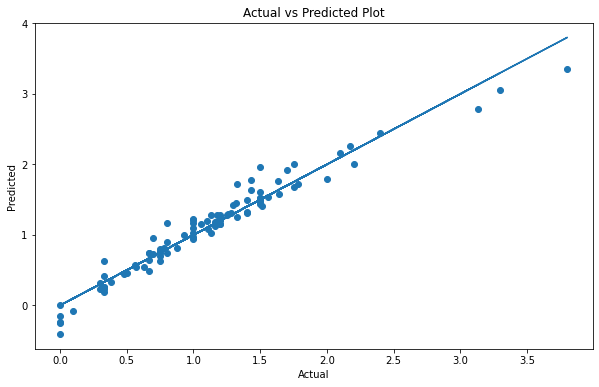

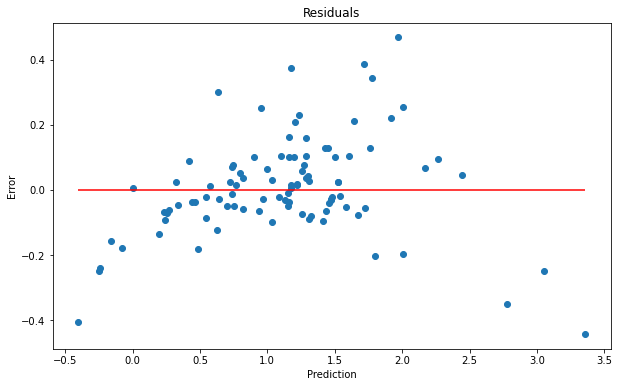

In [16]:
lr = LinearRegression()
lr = evaluateModel(lr, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

TRAINING SET
root mean squared error (RMSE): 0.1529487735404156
R-squared (R2 ): 0.9502631541410319
MAE 0.11181288223504253

Testing SET
root mean squared error (RMSE): 0.15229857912178202
R-squared (R2 ): 0.9478280972948567
MAE 0.10941001046487625


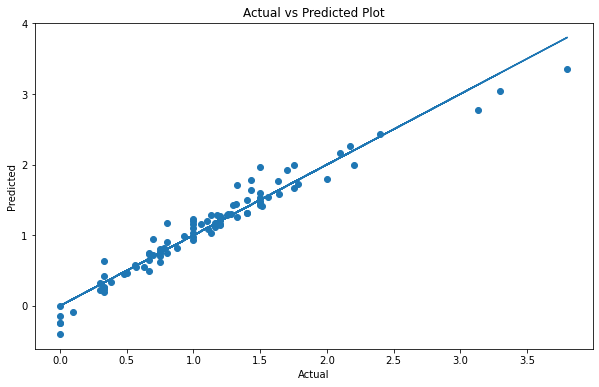

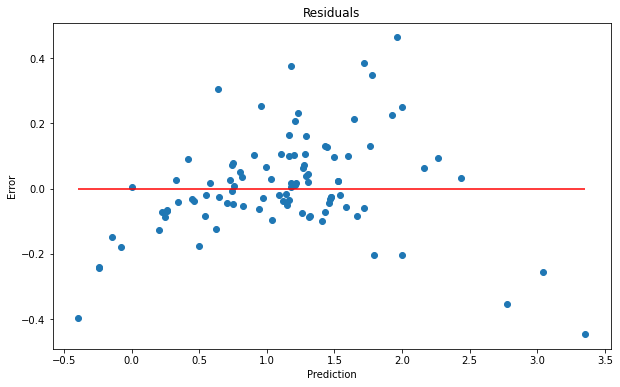

In [17]:
ridge = Ridge()
ridge = evaluateModel(ridge, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

In [ ]:
# Elastic net, DecisionTreeRegressor, 

TRAINING SET
root mean squared error (RMSE): 0.07558939756487976
R-squared (R2 ): 0.9878519097172203
MAE 0.055533564013840866

Testing SET
root mean squared error (RMSE): 0.21798076619965745
R-squared (R2 ): 0.893123721714295
MAE 0.1525958762886598


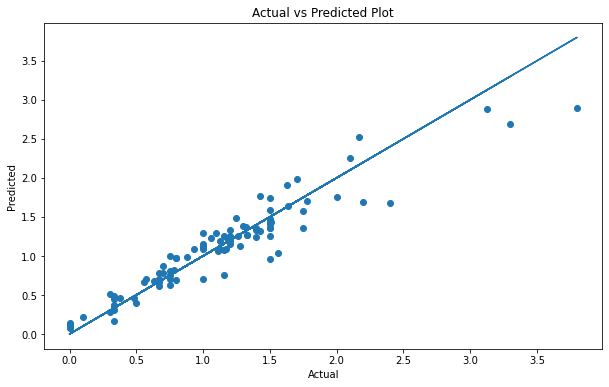

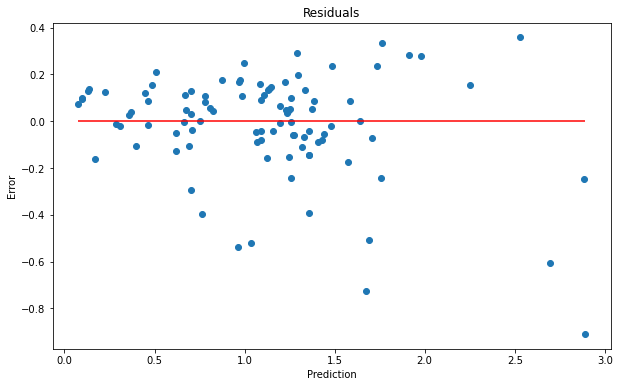

In [22]:
rf = RandomForestRegressor()
rf = evaluateModel(rf, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

TRAINING SET
root mean squared error (RMSE): 0.18108782142262586
R-squared (R2 ): 0.9302788196961432
MAE 0.1539781781706955

Testing SET
root mean squared error (RMSE): 0.2549979117729174
R-squared (R2 ): 0.8537424748446432
MAE 0.1846787972691475


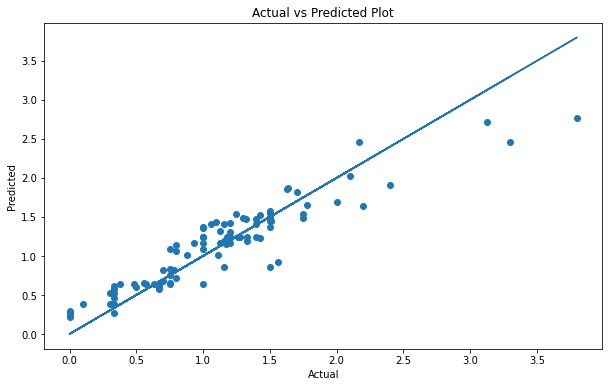

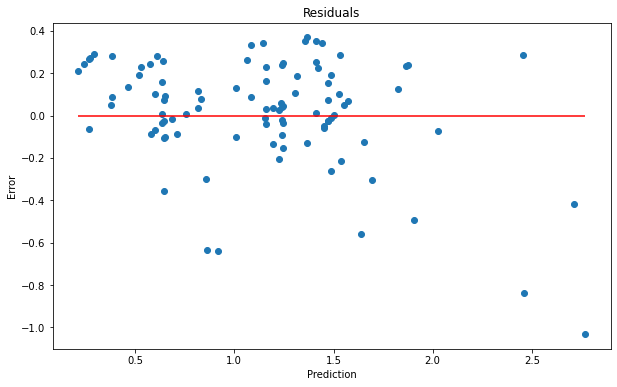

In [23]:
ada = AdaBoostRegressor(random_state=42)
ada = evaluateModel(ada, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

TRAINING SET
root mean squared error (RMSE): 0.05897207747719745
R-squared (R2 ): 0.992606005936543
MAE 0.04725797745267679

Testing SET
root mean squared error (RMSE): 0.17384930558276393
R-squared (R2 ): 0.9320184764985453
MAE 0.1265460597413268


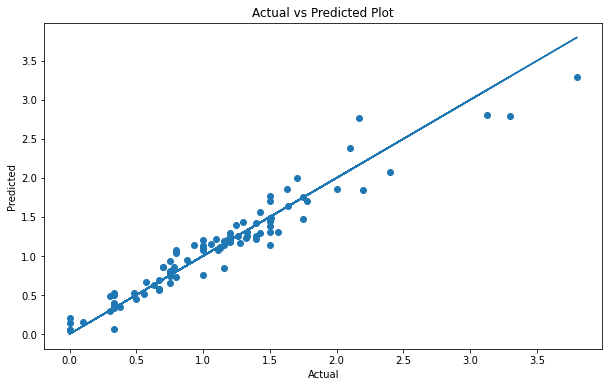

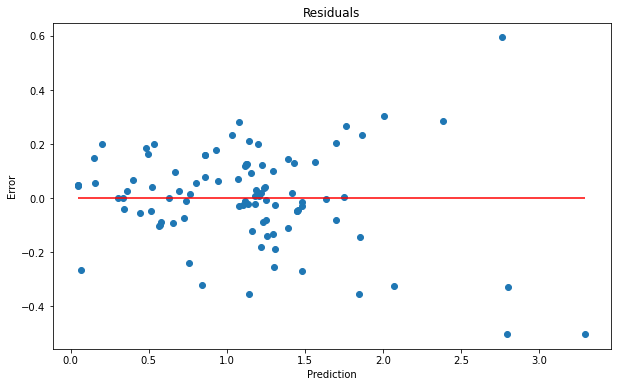

In [24]:
gb = GradientBoostingRegressor(random_state=42)
gb = evaluateModel(gb, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

TRAINING SET
root mean squared error (RMSE): 0.001246472564155018
R-squared (R2 ): 0.9999966966720635
MAE 0.0008272528082674531

Testing SET
root mean squared error (RMSE): 0.21579359475067117
R-squared (R2 ): 0.8952577082710819
MAE 0.1441402509570429


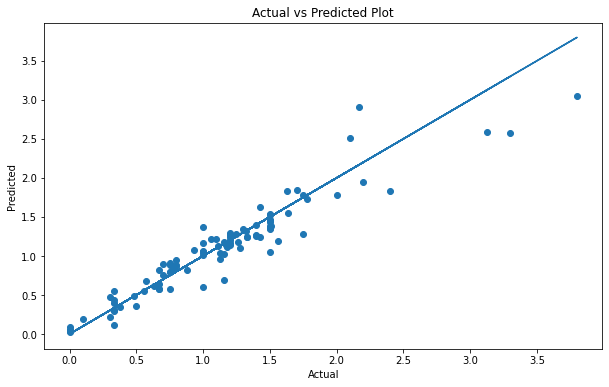

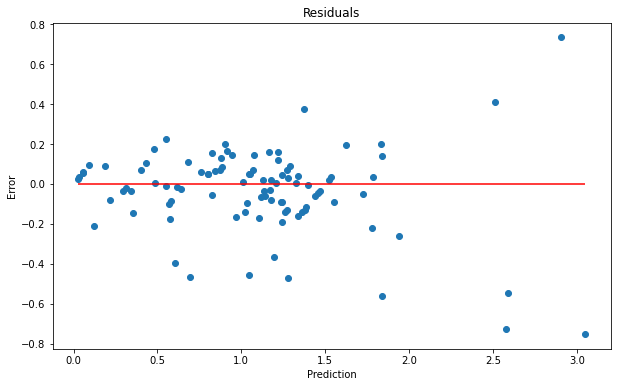

In [27]:
xgb = XGBRegressor(random_state=42)
xgb = evaluateModel(xgb, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

TRAINING SET
root mean squared error (RMSE): 0.09288588991773652
R-squared (R2 ): 0.981656350847451
MAE 0.06298867860834502

Testing SET
root mean squared error (RMSE): 0.22382123652646777
R-squared (R2 ): 0.8873198143168787
MAE 0.14992907805459546


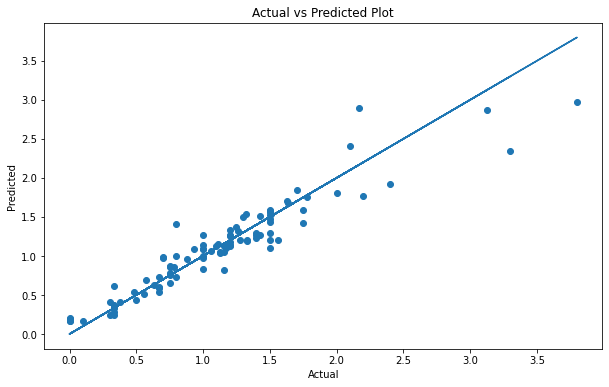

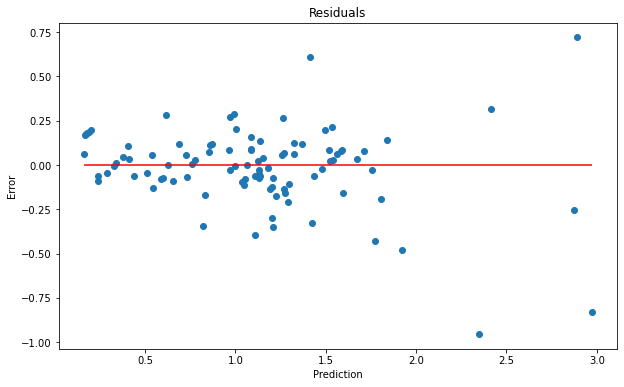

In [28]:
lgbm = LGBMRegressor(random_state=42)
lgbm = evaluateModel(lgbm, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

TRAINING SET
root mean squared error (RMSE): 0.07154630597921098
R-squared (R2 ): 0.9925354661401656
MAE 0.05593906435168812

Testing SET
root mean squared error (RMSE): 0.2193029970583779
R-squared (R2 ): 0.9401974260802242
MAE 0.14655436706154226


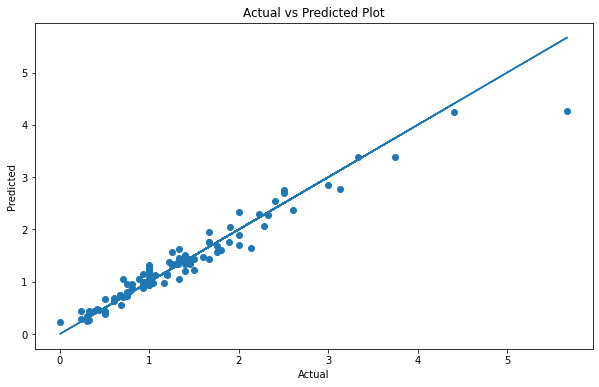

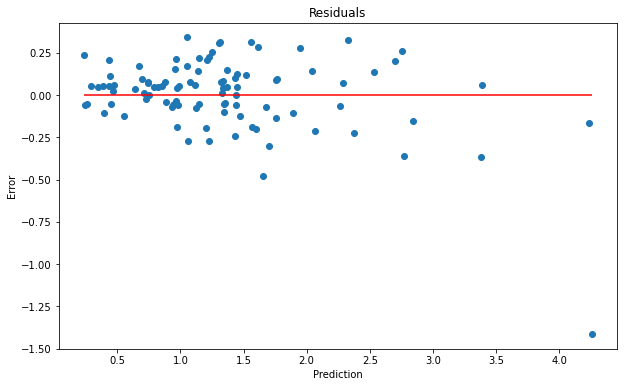

In [29]:
gb = GradientBoostingRegressor(random_state=42)
gb = evaluateModel(gb, xGA_X_train, xGA_y_train, xGA_X_test, xGA_y_test)

TRAINING SET
root mean squared error (RMSE): 0.17982939715693427
R-squared (R2 ): 0.9528426232771184
MAE 0.12948300516360034

Testing SET
root mean squared error (RMSE): 0.1800383145074184
R-squared (R2 ): 0.9596948427681128
MAE 0.1293459630411538


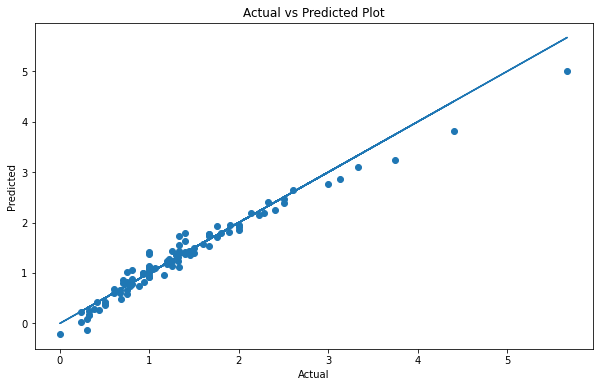

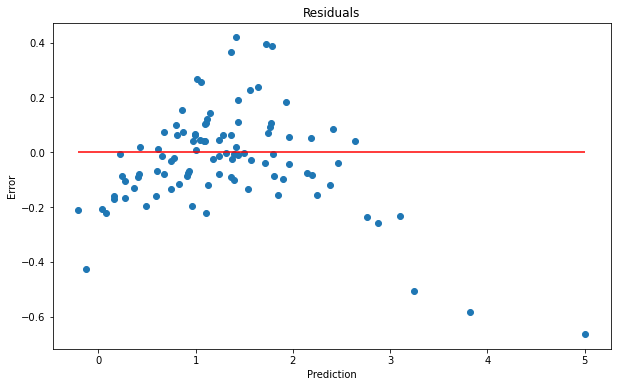

In [30]:
lr = LinearRegression()
lr = evaluateModel(lr, xGA_X_train, xGA_y_train, xGA_X_test, xGA_y_test)